## Exploratory Data Analysis (EDA)

#### Introduction to the Dataset
The dataset consists of 1,610 samples and 15 features related to demographic factors, lifestyle habits, and health indicators. The target variable, `Class`, categorizes individuals based on weight status, including different levels of obesity. Features such as `Age`, `Height`, `Physical_Exercise`, and dietary habits are explored to identify their relationship with weight classes.

#### Data Overview
After loading the data, we noticed:
- There are no missing values, as all features have 1,610 non-null entries.
- All features are numeric, with categorical data encoded as integers (e.g., `Sex`, `Smoking`).
- The `Age` feature ranges from 18 to 54 years, with a mean age of approximately 33 years.

#### Statistical Summary
The `df.describe()` output reveals:
- **Age:** The mean age is 33, with a standard deviation of 9.8, suggesting a fairly young population. The interquartile range (25–75%) indicates a concentration between ages 25 and 41.
- **Height:** Heights range from 150 cm to 193 cm, with a median around 168 cm. This suggests a diverse representation in terms of physical stature.
- **Physical Exercise:** The average is approximately 3.26 on a scale from 1 to 5, indicating moderate exercise frequency.

#### Correlation Analysis
Correlation analysis shows:
- **Physical Exercise** has a negative correlation with obesity levels (`Class`), indicating higher activity tends to be associated with lower obesity levels.
- **Consumption of Fast Food** shows a positive correlation with the `Class`, suggesting higher consumption is associated with greater weight issues.
- **Age** has a weaker correlation, implying that age alone is not a strong predictor of obesity levels in this dataset.

#### Data Visualization
- **Boxplots for `Sex` and `Class`:** Males (encoded as 2) and females (encoded as 1) show different distributions across weight categories, with males more spread across higher obesity classes.
- **Schedule Dedicated to Technology vs. Class:** Higher time spent on technology tends to align with higher obesity levels, possibly indicating a more sedentary lifestyle.
- **Line Plot for Age vs. Class:** There is no clear trend across age groups, suggesting that other factors might play a stronger role than age in determining weight class.

#### Feature Engineering
- Binning `Age` into categories revealed a slight trend where individuals in their late 20s to early 30s are more prone to higher obesity levels.
- Dropping less correlated features like `Schedule_Dedicated_to_Technology` and `Liquid_Intake_Daily` helped streamline the model without sacrificing significant predictive power.

## Machine Learning Models

#### Data Preparation
The dataset was split into training and test sets (80/20 split), resulting in 1,288 training samples and 322 test samples. Categorical features were one-hot encoded, resulting in 11 features used for model training.

#### Model Selection and Performance
- **Logistic Regression:** Accuracy: 68.9%, struggled with higher obesity classes, indicating limited capacity to capture non-linear relationships.
- **Random Forest Classifier:** Achieved an accuracy of 87.8%, with the highest recall and F1-score among all models, suggesting it is effective at classifying multiple obesity levels.
- **XGBoost:** Accuracy of 87.5%, performed well but slightly under Random Forest, likely due to the smaller dataset limiting the need for advanced boosting techniques.

#### Hyperparameter Tuning
- **Random Forest:** Tuning resulted in an optimal depth of 20 with 200 estimators, reaching a final accuracy of 87.8%.
- **XGBoost:** Adjusting parameters like `max_depth` and `learning_rate` yielded an accuracy of 83.5%, slightly lower than Random Forest, potentially due to overfitting during the tuning process.

#### Confusion Matrix Analysis
- Models often misclassified between adjacent weight classes (e.g., mild vs. moderate obesity), reflecting the challenges in distinguishing subtle differences in obesity levels.

#### Conclusion and Recommendations
- **Best Model:** Random Forest, with the highest accuracy and balanced precision-recall.
- **Next Steps:** Collecting more data, considering feature interactions, or trying deep learning models might improve classification further. Addressing class imbalance could also enhance performance.


| Model                                   | Accuracy | Precision | Recall  | F1      |
|-----------------------------------------|----------|-----------|---------|---------|
| Logistic Regression                     | 0.69     | 0.56      | 0.55    | 0.55    |
| Decision Tree Classifier                | 0.83     | 0.80      | 0.86    | 0.82    |
| Random Forest Classifier                | 0.88     | 0.89      | 0.90    | 0.90    |
| ExtraTreesClassifier                    | 0.87     | 0.89      | 0.90    | 0.89    |
| GradientBoostingClassifier              | 0.77     | 0.75      | 0.76    | 0.76    |
| AdaBoostClassifier                      | 0.68     | 0.60      | 0.58    | 0.59    |
| XGBClassifier                           | 0.88     | 0.87      | 0.89    | 0.88    |
| LGBMClassifier                          | 0.84     | 0.82      | 0.87    | 0.84    |
| HistGradientBoostingClassifier          | 0.86     | 0.85      | 0.87    | 0.86    |
| Stacking Classifier                     | 0.88     | 0.87      | 0.90    | 0.89    |
| **Tuned RandomForestClassifier**        | 0.88     | 0.89      | 0.90    | 0.90    |
| **Tuned XGBClassifier**                 | 0.84     | 0.84      | 0.81    | 0.82    |



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"C:\\Users\\ashka\\Downloads\\Kaggle\\Obesity Dataset\\Obesity_Dataset.xlsx")
df.sample(10)

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
744,2,27,158,2,1,2,2,2,1,3,2,1,2,4,1
1214,1,25,165,2,2,2,2,3,2,2,2,3,1,4,2
827,2,20,157,2,2,2,1,1,2,3,2,1,3,3,2
681,1,39,162,2,1,2,2,1,1,2,2,5,3,1,4
902,2,23,161,2,2,3,2,1,2,3,2,1,2,4,2
1029,2,32,161,2,2,3,2,4,2,1,2,5,1,1,3
498,1,32,181,1,2,2,1,4,2,2,2,2,2,4,3
917,2,23,177,2,2,3,1,3,2,3,1,3,2,4,2
165,2,26,168,2,2,2,1,3,2,1,1,3,2,3,2
88,2,23,156,2,2,2,1,1,2,2,2,3,2,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

In [6]:
df.describe()

,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,1.557764,33.115528,167.741615,1.834783,1.729193,2.063354,1.872050,2.395652,1.69441,2.108696,1.822360,3.265839,2.012422,2.667081,2.678882
std,0.496806,9.835076,7.979873,0.371492,0.444515,0.746043,0.638345,1.010501,0.46080,0.814710,0.382328,1.343035,0.697929,1.518388,0.815855
min,1.000000,18.000000,150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,25.000000,161.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.00000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000
50%,2.000000,32.000000,168.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000
75%,2.000000,41.000000,174.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.00000,3.000000,2.000000,4.000000,2.000000,4.000000,3.000000
max,2.000000,54.000000,193.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.00000,3.000000,2.000000,5.000000,3.000000,5.000000,4.000000


<Axes: title={'center': 'Correlation between Target and Features'}>

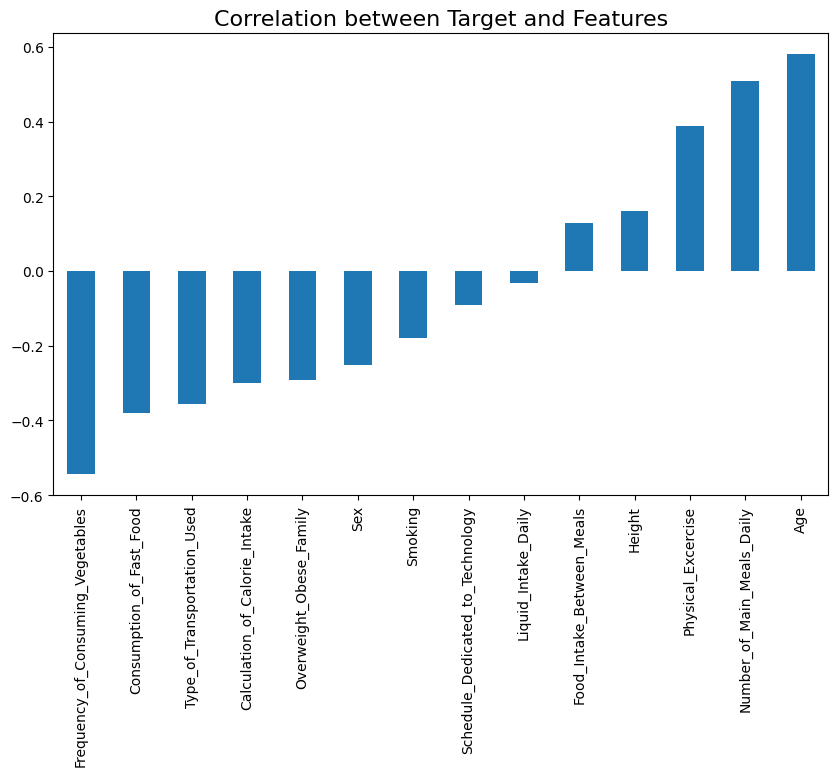

In [7]:
corr = df.corr()['Class'][:-1].sort_values(ascending=True).plot(kind='bar', figsize=(10, 6))
corr.set_title('Correlation between Target and Features', fontsize=16)
corr

In [8]:
print(corr)

Axes(0.125,0.11;0.775x0.77)


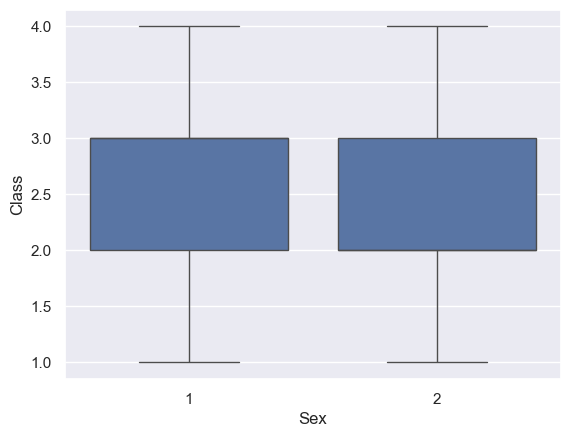

In [9]:
sns.set()
sns.boxplot(x='Sex', y='Class', data=df)
plt.show()

<Axes: xlabel='Schedule_Dedicated_to_Technology', ylabel='Class'>

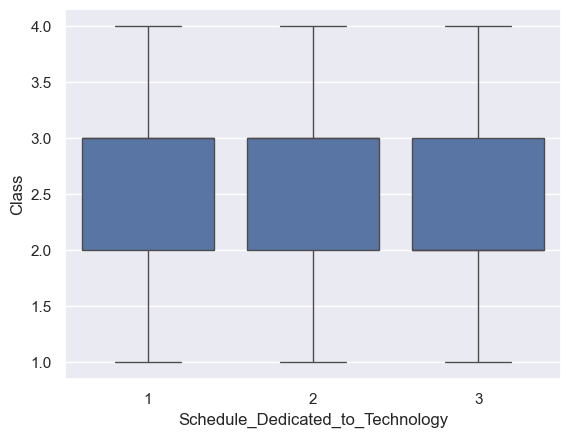

In [10]:
sns.boxplot(x='Schedule_Dedicated_to_Technology',y = 'Class',data= df)

<Axes: xlabel='Liquid_Intake_Daily', ylabel='Class'>

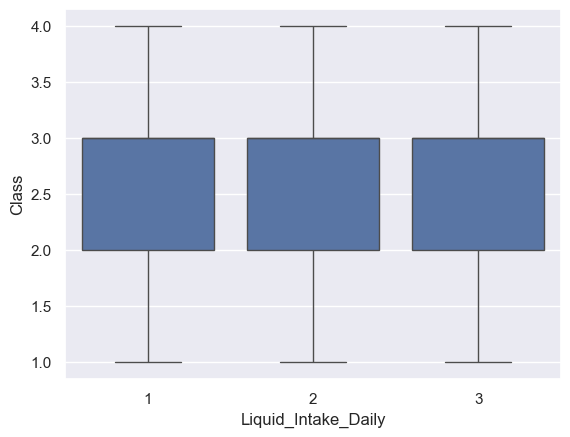

In [11]:
sns.boxplot(x='Liquid_Intake_Daily',y = 'Class',data= df)


<Axes: xlabel='Food_Intake_Between_Meals', ylabel='Class'>

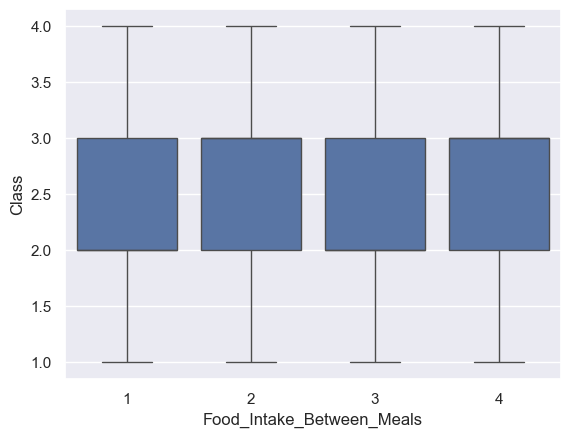

In [12]:
sns.boxplot(x='Food_Intake_Between_Meals',y = 'Class',data= df)

### The columns with small correlation values can be removed

<Axes: xlabel='Age', ylabel='Class'>

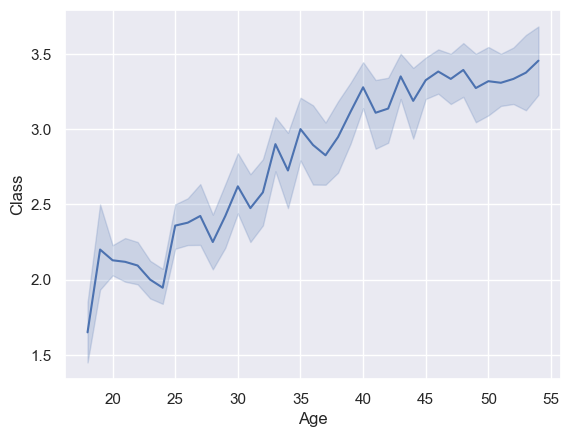

In [13]:
sns.lineplot(x='Age',y = 'Class',data= df)

In [14]:
def Age_Bins(x):
    if x < 20: return 0
    elif x > 20 and x <= 25: return 1
    elif x > 25 and x <= 30: return 2
    elif x > 30 and x <= 35: return 3
    elif x > 35 and x <= 40: return 4
    elif x > 40 and x <= 45: return 5
    elif x > 45 and x <= 50: return 6
    elif x > 50 and x <= 55: return 7
    elif x > 55 and x <= 60: return 8

df['Age_Bins'] = df['Age'].apply(Age_Bins)
df['Age_Bins'].dtype

dtype('float64')

<Axes: xlabel='Age_Bins', ylabel='Class'>

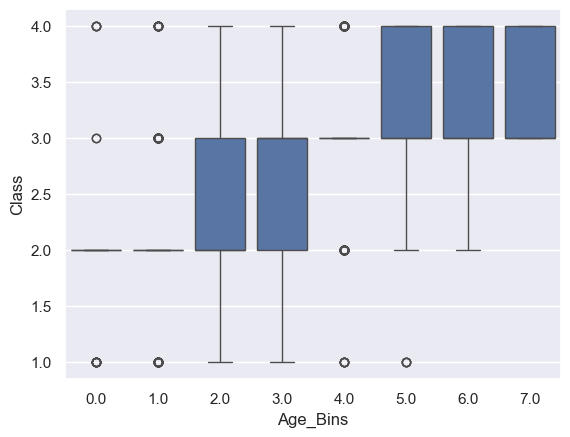

In [15]:
sns.boxplot(x='Age_Bins',y = 'Class',data= df)

In [16]:
df.drop(['Schedule_Dedicated_to_Technology', 'Liquid_Intake_Daily', 'Food_Intake_Between_Meals', 'Age'], axis=1, inplace=True)

<Axes: >

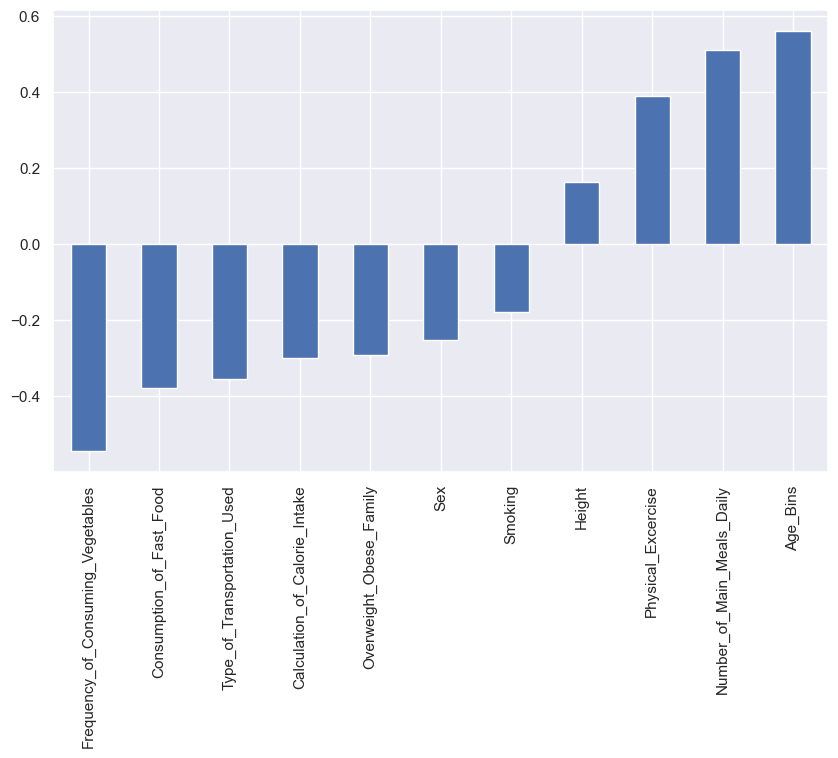

In [17]:
df_corr = df.corr()['Class'].sort_values(ascending=True)
df_corr[:-1].plot(kind='bar', figsize=(10, 6))

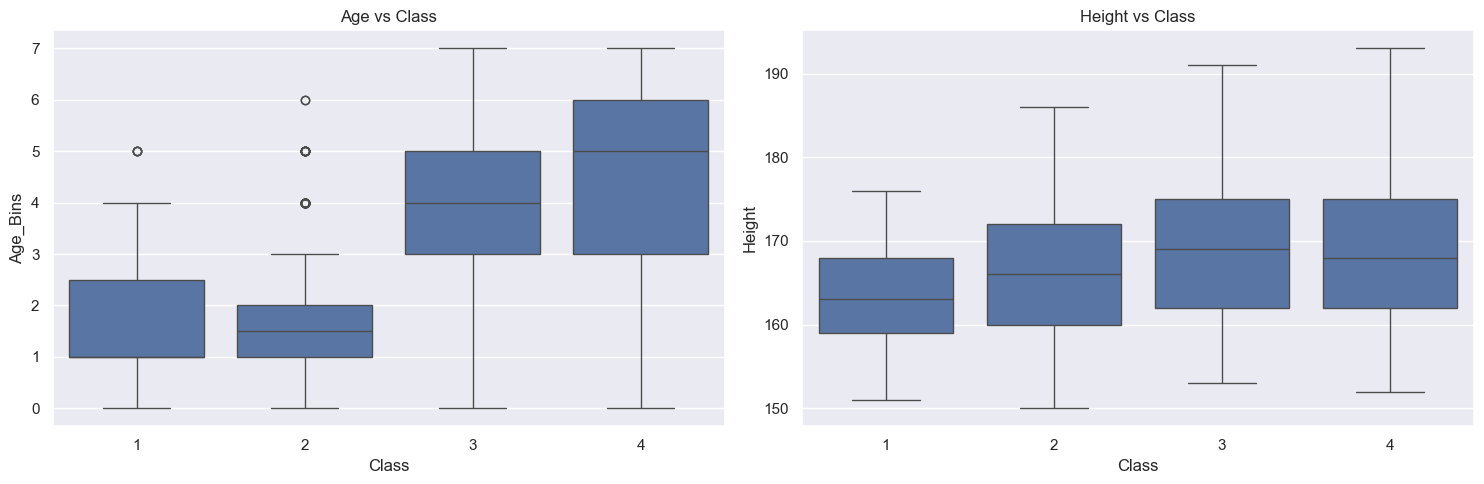

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='Class', y='Age_Bins', data=df, ax=axes[0])
axes[0].set_title('Age vs Class')

sns.boxplot(x='Class', y='Height', data=df, ax=axes[1])
axes[1].set_title('Height vs Class')

plt.tight_layout()
plt.show()

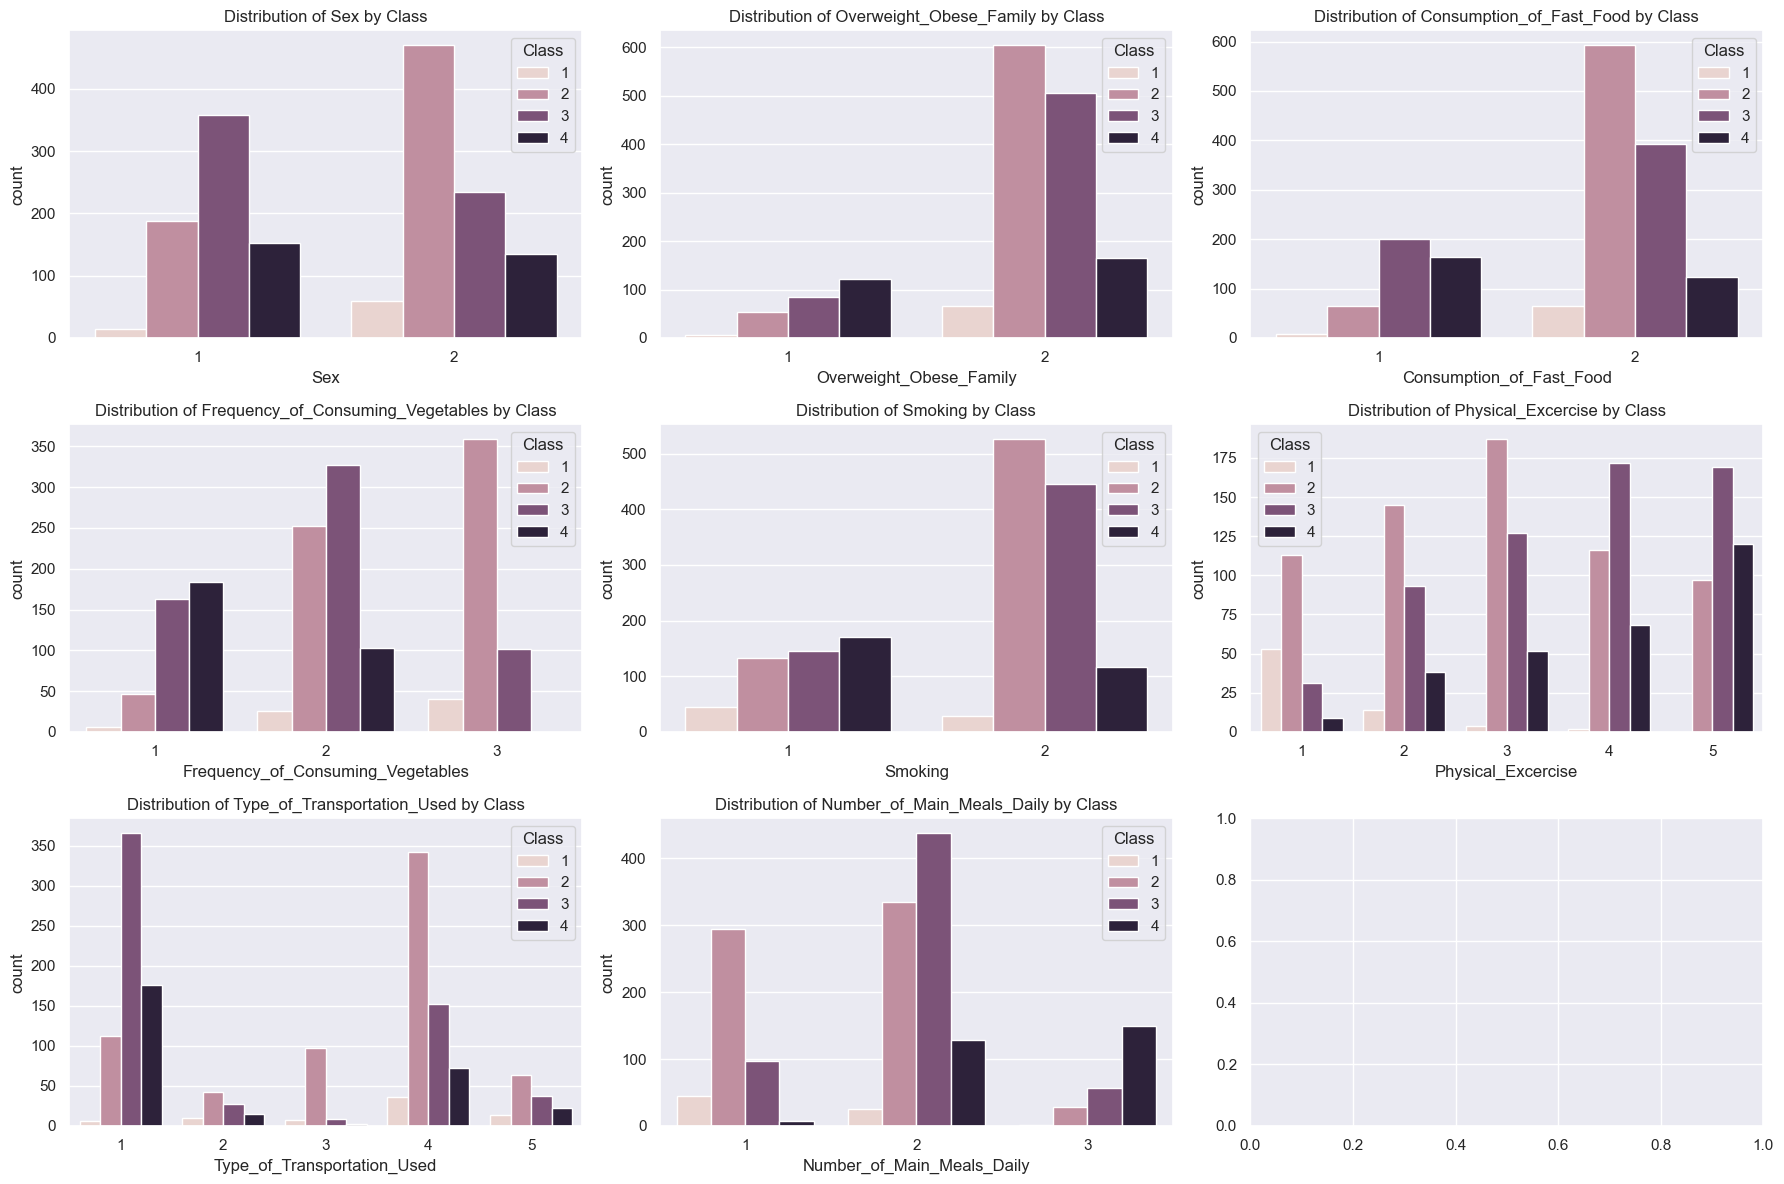

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

categorical_features = ['Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 
                        'Frequency_of_Consuming_Vegetables', 'Smoking', 'Physical_Excercise', 
                        'Type_of_Transportation_Used', 'Number_of_Main_Meals_Daily']

for i, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='Class', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Class')

plt.tight_layout()
plt.show()


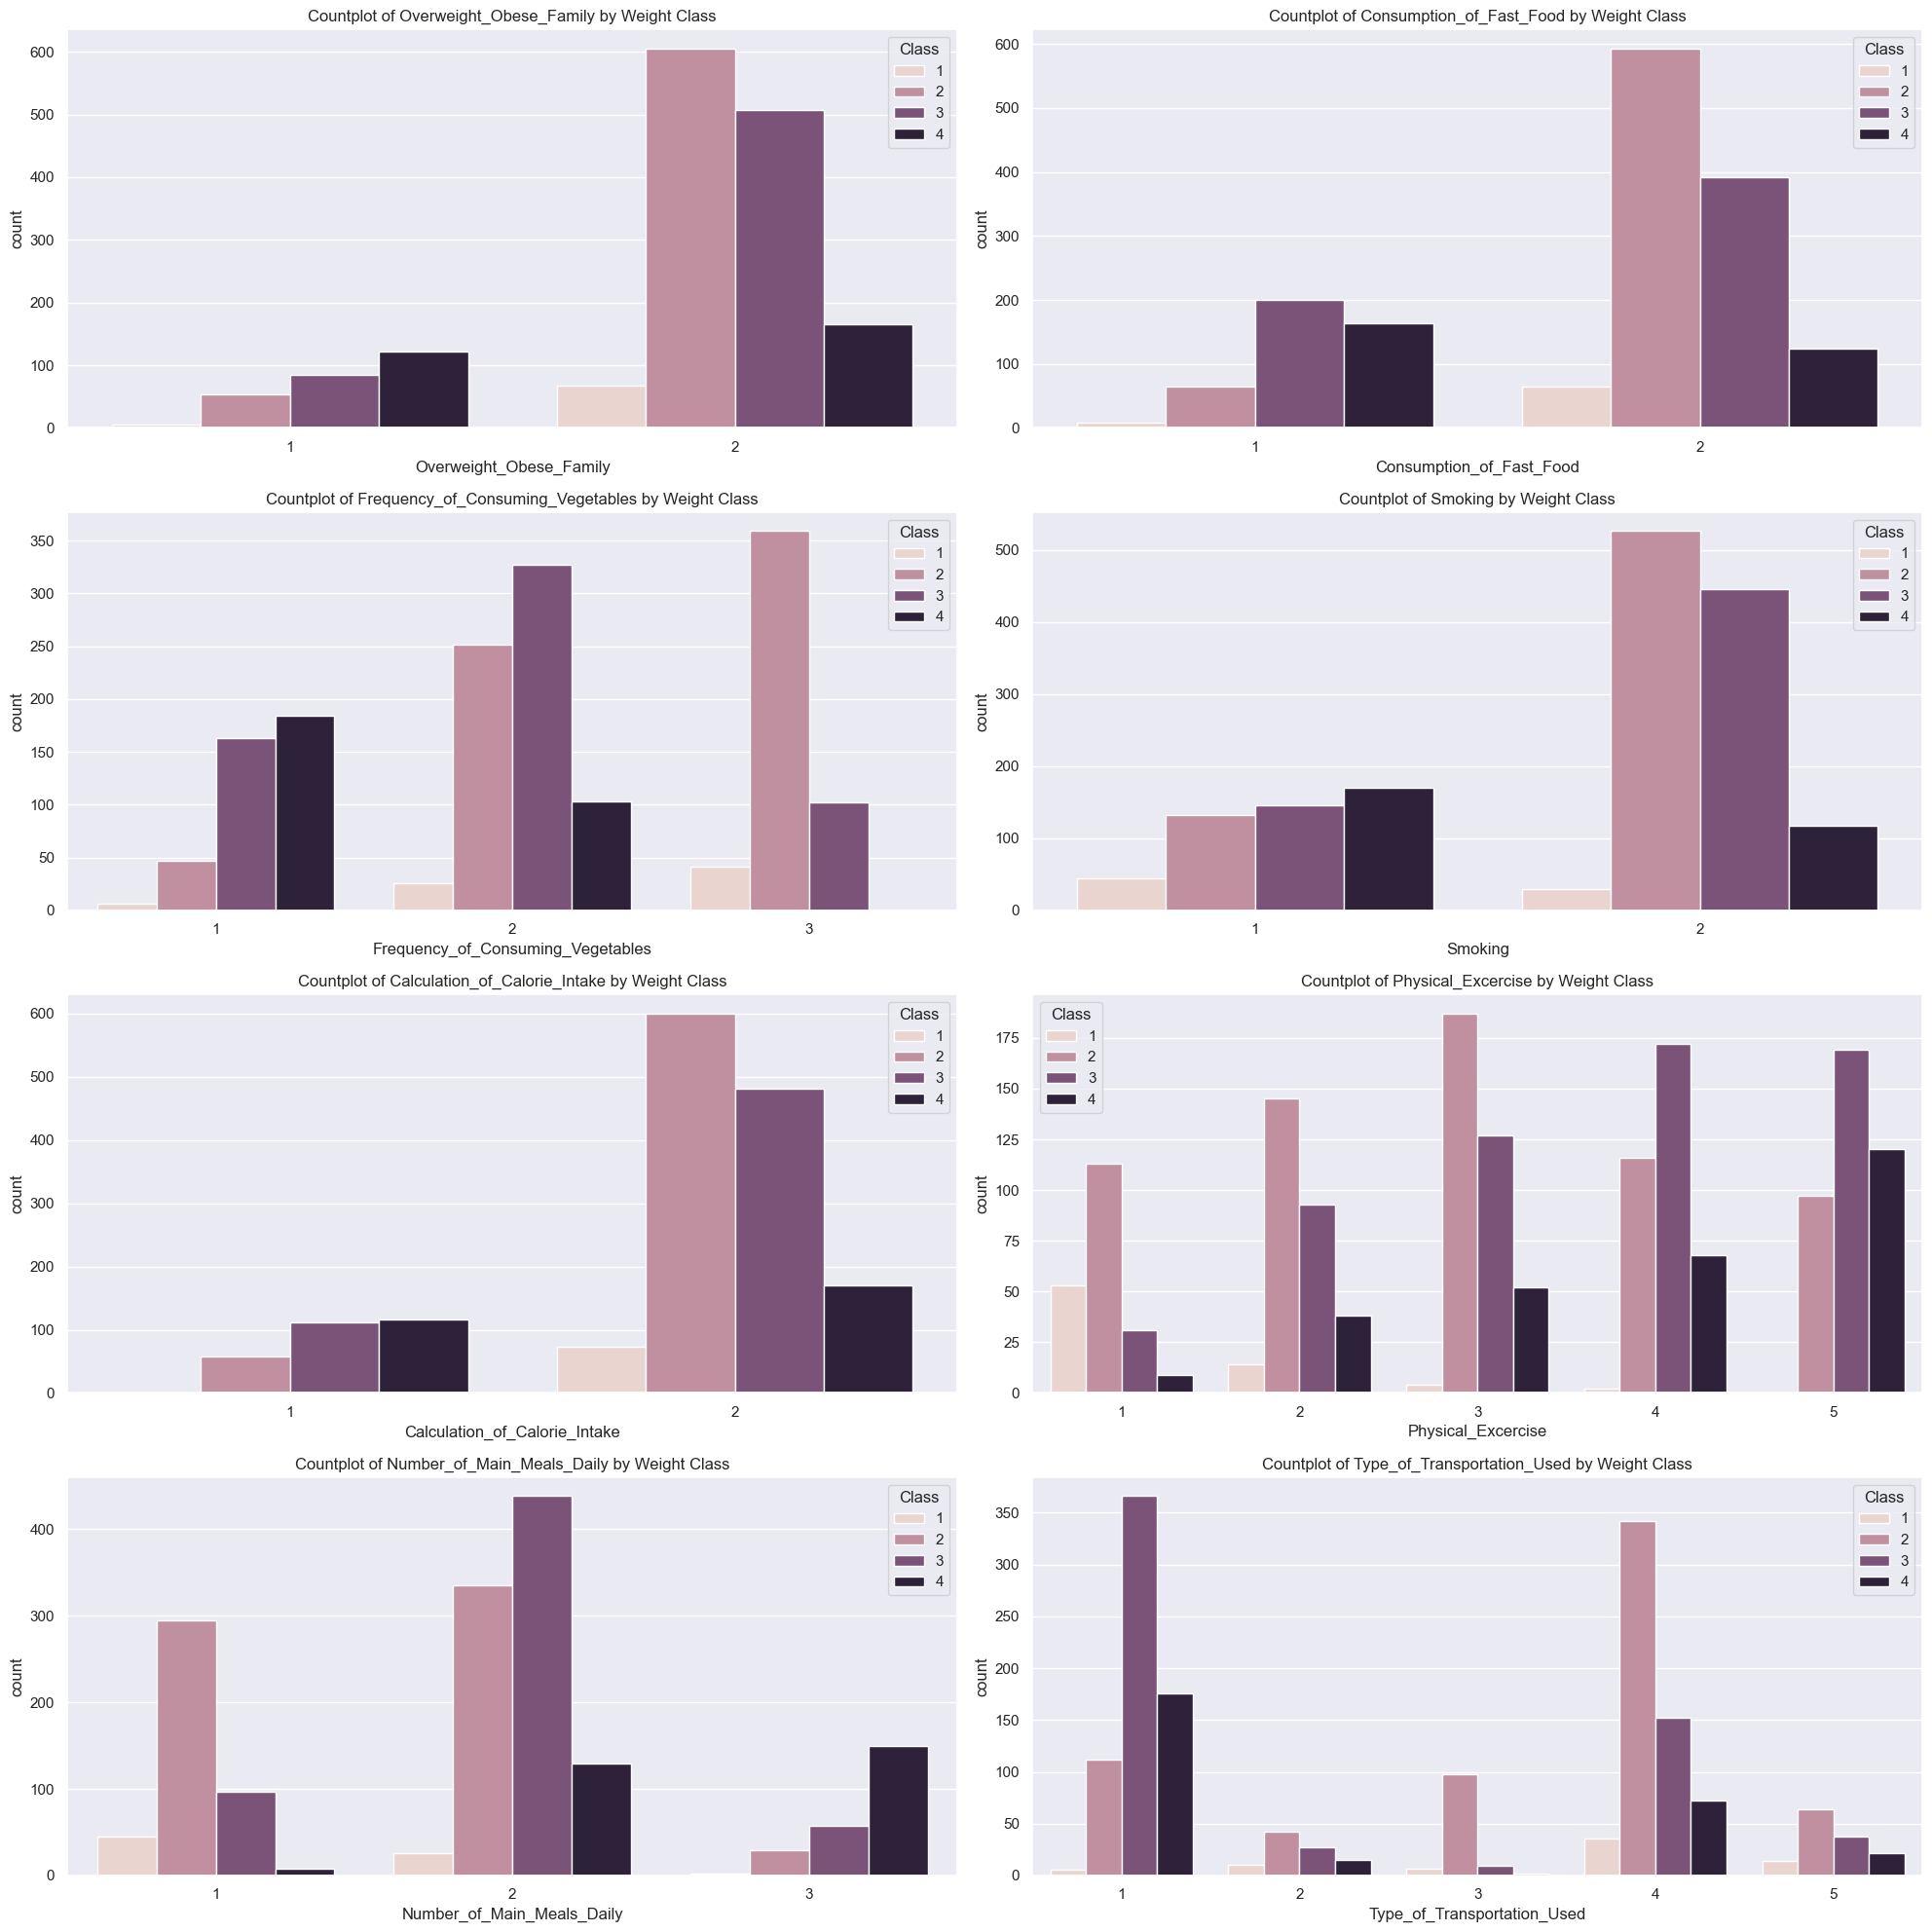

In [20]:
categorical_cols = ['Overweight_Obese_Family', 'Consumption_of_Fast_Food', 
                    'Frequency_of_Consuming_Vegetables', 'Smoking', 
                    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 
                    'Number_of_Main_Meals_Daily', 'Type_of_Transportation_Used']

plt.figure(figsize=(20, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='Class')
    plt.title(f'Countplot of {col} by Weight Class')
    plt.tight_layout()
plt.show()

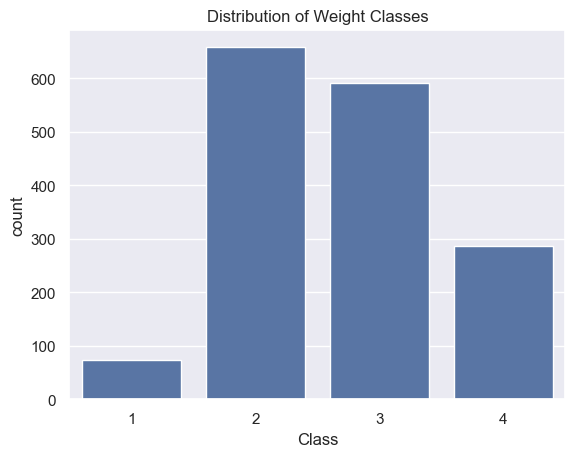

In [21]:
sns.countplot(data=df, x='Class')
plt.title('Distribution of Weight Classes')
plt.show()

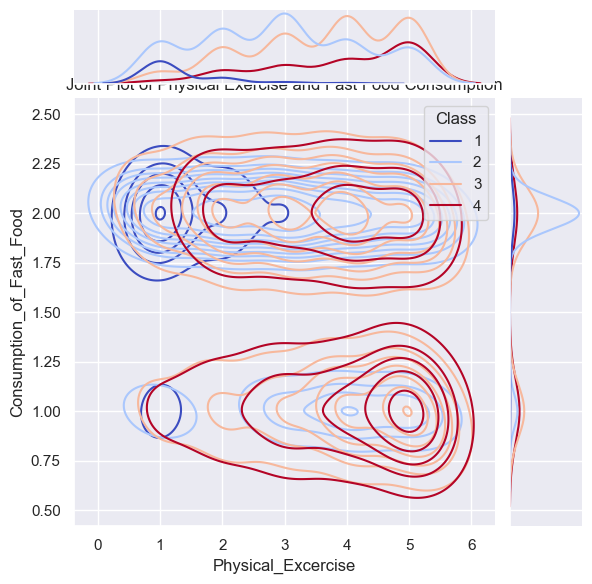

In [22]:
sns.jointplot(data=df, x='Physical_Excercise', y='Consumption_of_Fast_Food', hue='Class', kind="kde", palette="coolwarm")
plt.title('Joint Plot of Physical Exercise and Fast Food Consumption')
plt.show()

In [23]:
df.columns

Index(['Sex', 'Height', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food',
       'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
       'Smoking', 'Calculation_of_Calorie_Intake', 'Physical_Excercise',
       'Type_of_Transportation_Used', 'Class', 'Age_Bins'],
      dtype='object')

In [24]:
selected_cols = ['Sex', 'Height', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 'Frequency_of_Consuming_Vegetables', 
                 'Number_of_Main_Meals_Daily', 'Smoking', 'Calculation_of_Calorie_Intake', 'Physical_Excercise', 
                 'Type_of_Transportation_Used', 'Age_Bins', 'Class']

df = df[selected_cols]

from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((1288, 11), (322, 11))

In [26]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

In [27]:
X_train.shape, X_test.shape

((1288, 11), (322, 11))

Training Logistic Regression...
Logistic Regression Confusion Matrix:
[[ 1 11  1  0]
 [ 4 98 23  0]
 [ 1 21 87 22]
 [ 0  3 14 36]]
Training Decision Tree Classifier...
Decision Tree Classifier Confusion Matrix:
[[ 13   0   0   0]
 [  4 114   6   1]
 [  0  16  99  16]
 [  0   1  12  40]]
Training Random Forest Classifier...


c:\Users\ashka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ashka\AppData\Local\Temp\ipykernel_29488\3615959774.py:74: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result_row], ignore_index=True)


Random Forest Classifier Confusion Matrix:
[[ 13   0   0   0]
 [  0 118   6   1]
 [  0  11 107  13]
 [  0   1   7  45]]
Training ExtraTreesClassifier...
ExtraTreesClassifier Confusion Matrix:
[[ 13   0   0   0]
 [  0 117   7   1]
 [  0  11 107  13]
 [  0   1   8  44]]
Training GradientBoostingClassifier...
GradientBoostingClassifier Confusion Matrix:
[[ 10   2   1   0]
 [  3 100  21   1]
 [  0  13  98  20]
 [  0   2  12  39]]
Training AdaBoostClassifier...
AdaBoostClassifier Confusion Matrix:
[[ 4  8  1  0]
 [ 6 99 19  1]
 [ 0 23 85 23]
 [ 0  4 18 31]]
Training XGBClassifier...
XGBClassifier Confusion Matrix:
[[ 13   0   0   0]
 [  1 119   5   0]
 [  0  11 109  11]
 [  0   2  10  41]]
Training LGBMClassifier...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Num

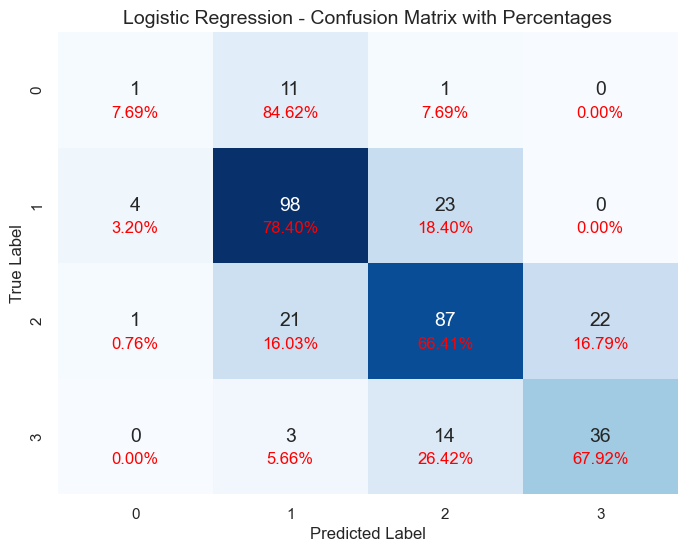

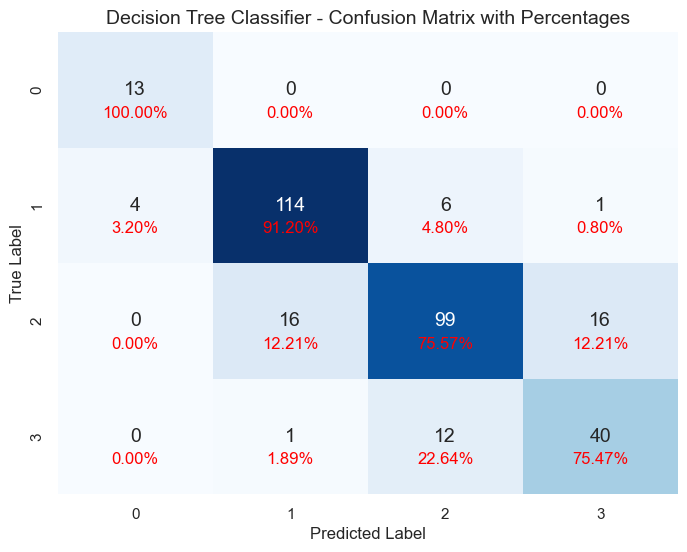

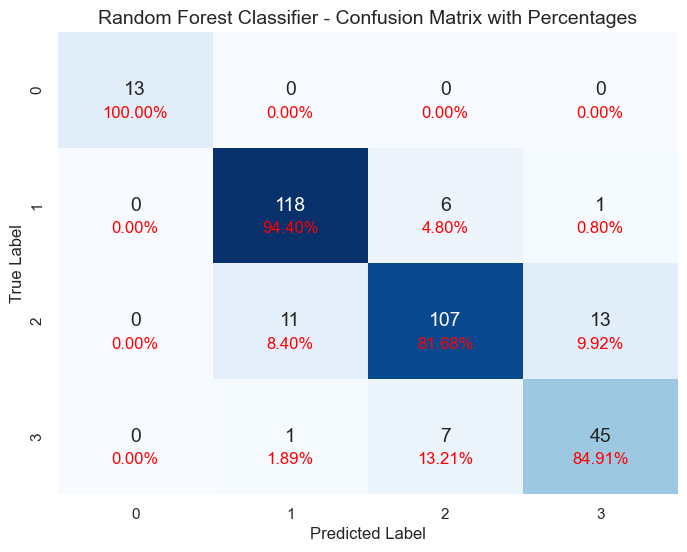

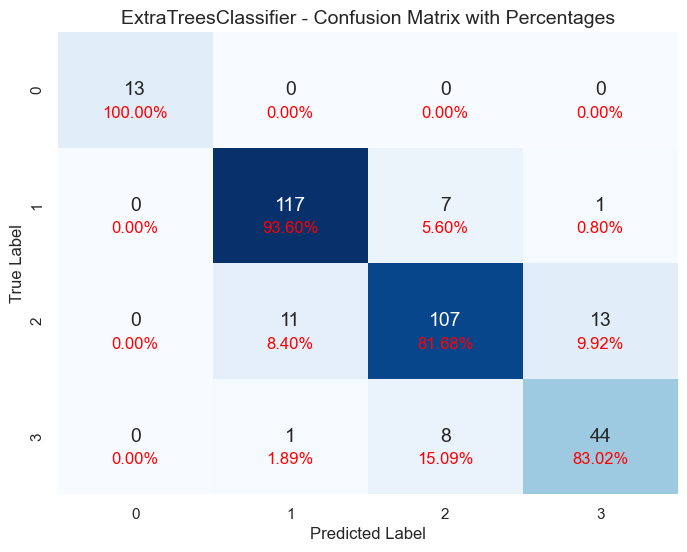

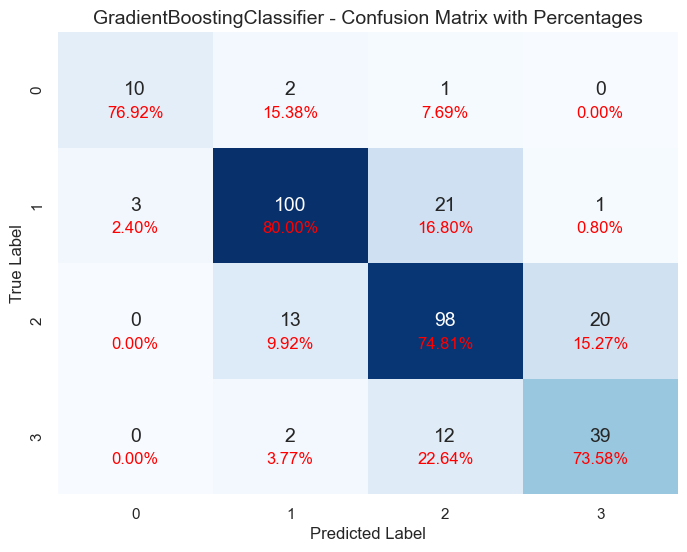

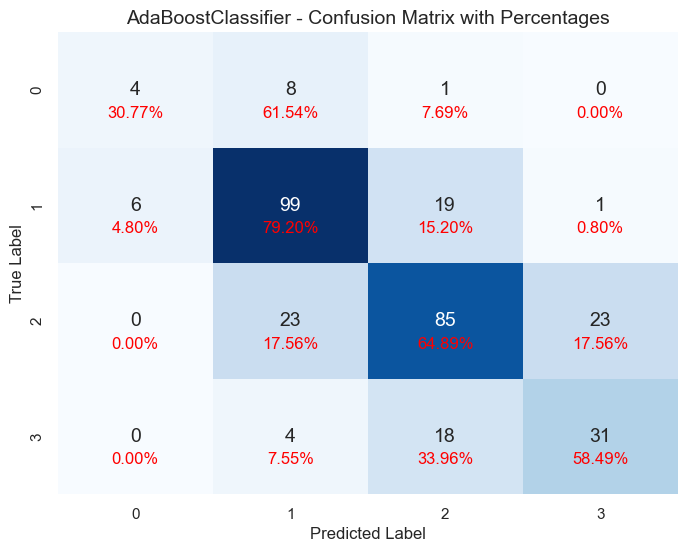

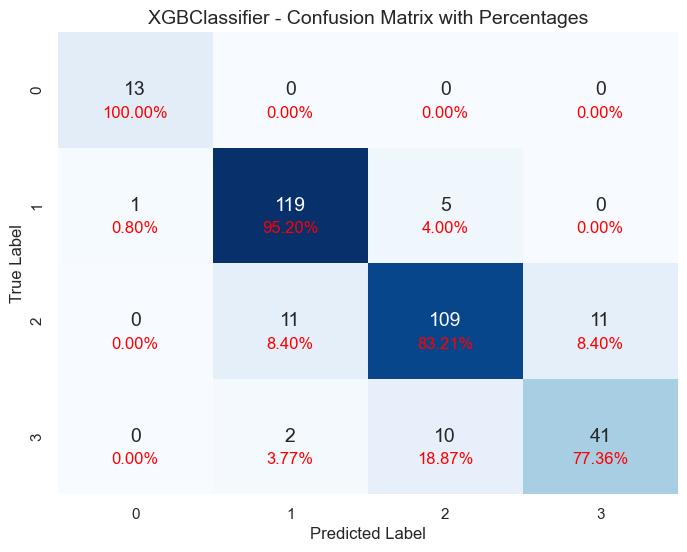

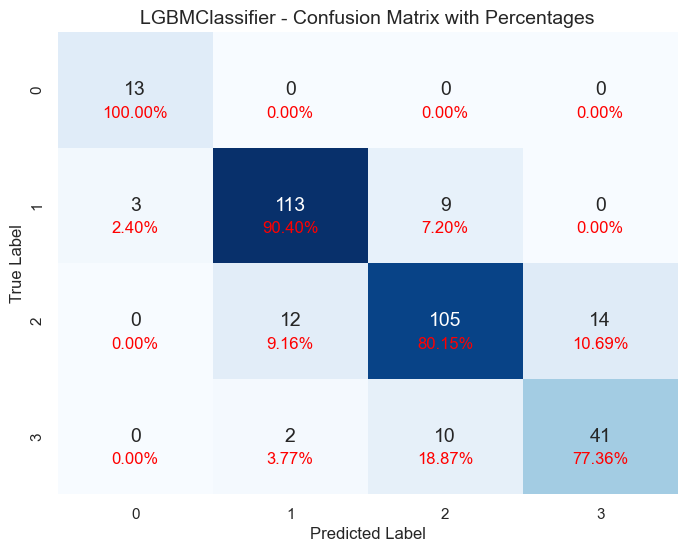

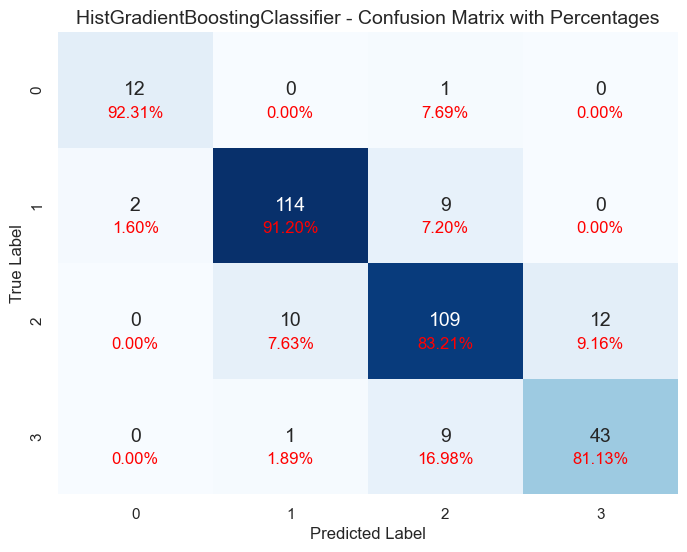

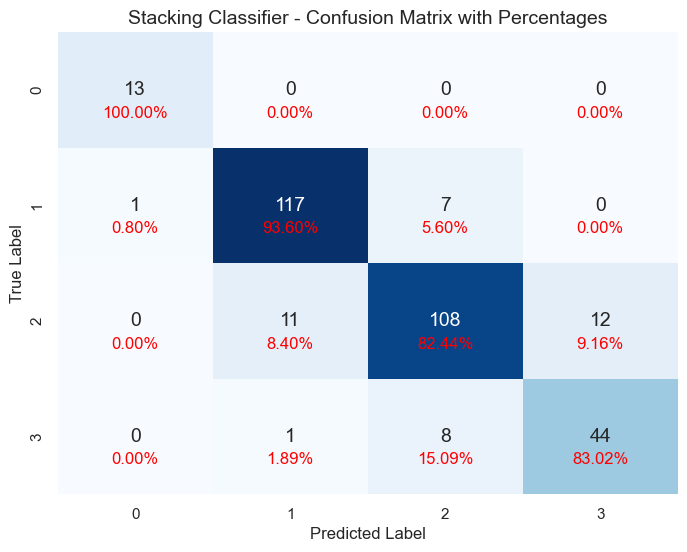

                            Model  Accuracy  Precision    Recall        F1
0             Logistic Regression  0.689441   0.555050  0.551073  0.548322
1        Decision Tree Classifier  0.826087   0.795711  0.855611  0.820738
2        Random Forest Classifier  0.878882   0.890518  0.902463  0.895413
3            ExtraTreesClassifier  0.872671   0.885662  0.895746  0.889976
4      GradientBoostingClassifier  0.767081   0.754089  0.763293  0.757797
5              AdaBoostClassifier  0.680124   0.598375  0.583363  0.588918
6                   XGBClassifier  0.875776   0.874395  0.889411  0.881222
7                  LGBMClassifier  0.844720   0.823623  0.869778  0.844041
8  HistGradientBoostingClassifier  0.863354   0.850631  0.869615  0.859721
9             Stacking Classifier  0.875776   0.874828  0.897654  0.885489


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Adjust class labels for XGBoost to be zero-indexed
y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# List of models to test
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)),
    ('Random Forest Classifier', RandomForestClassifier(random_state=42)),
    ('ExtraTreesClassifier', ExtraTreesClassifier(random_state=42)),
    ('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)),
    ('AdaBoostClassifier', AdaBoostClassifier(random_state=42, algorithm='SAMME')),
    ('XGBClassifier', XGBClassifier(random_state=42, eval_metric='mlogloss')),
    ('LGBMClassifier', LGBMClassifier(random_state=42)),
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier(random_state=42)),
    ('Stacking Classifier', StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('xgb', XGBClassifier(random_state=42, eval_metric='mlogloss')),
        ('lgbm', LGBMClassifier(random_state=42))
    ], final_estimator=LogisticRegression()))
]

# Initialize result DataFrame
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# Initialize an empty dictionary to store predictions
model_predictions = {}

# Model training and evaluation loop
for name, model in models:
    print(f"Training {name}...")
    
    try:
        # Use imputed data
        if name == 'XGBClassifier':
            # Adjusted labels for XGBClassifier
            model.fit(X_train_imputed, y_train_adjusted)
            y_pred = model.predict(X_test_imputed) + 1  # Convert back to original labels
        else:
            model.fit(X_train_imputed, y_train)
            y_pred = model.predict(X_test_imputed)
        
        # Save the predictions for heatmap plotting later
        model_predictions[name] = y_pred
        
        # Calculate performance metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')
        
        # Append results to DataFrame using pd.concat()
        result_row = pd.DataFrame({
            'Model': [name],
            'Accuracy': [accuracy],
            'Precision': [precision],
            'Recall': [recall],
            'F1': [f1]
        })
        results = pd.concat([results, result_row], ignore_index=True)
        
        # Optionally, display confusion matrix for each model
        print(f"{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    
    except Exception as e:
        print(f"Error with {name}: {e}")

def plot_confusion_matrix_heatmap(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
    
    # Overlay percentages below the number
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            # Move the percentage slightly below the main text
            ax.text(j + 0.5, i + 0.7, f"{cm_percent[i, j]:.2f}%", 
                    ha="center", va="center", color="red", fontsize=12)
    
    plt.title(f"{model_name} - Confusion Matrix with Percentages", fontsize=14)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


# Loop through each model and plot its confusion matrix heatmap
for model_name, y_pred in model_predictions.items():
    plot_confusion_matrix_heatmap(model_name, y_test, y_pred)

# Display final results
print(results)

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for RandomForestClassifier
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, verbose=2, n_jobs=-1)

# Perform the grid search
grid_search_rf.fit(X_train_imputed, y_train)

# Get the best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict and evaluate with the best model
y_pred_rf_tuned = best_rf_model.predict(X_test_imputed)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f"Tuned RandomForestClassifier Accuracy: {accuracy_rf_tuned}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tuned RandomForestClassifier Accuracy: 0.8788819875776398


In [30]:
# Define the hyperparameters for XGBClassifier
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.3, 0.7, 1],
    'subsample': [0.6, 0.8, 1],
    'gamma': [0, 0.1, 0.3],
}

# Initialize GridSearchCV for XGBClassifier
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, eval_metric='mlogloss'), param_grid_xgb, cv=3, verbose=2, n_jobs=-1)

# Perform the grid search
grid_search_xgb.fit(X_train_imputed, y_train_adjusted)

# Get the best model from grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Predict and evaluate with the best model
y_pred_xgb_tuned = best_xgb_model.predict(X_test_imputed) + 1  # Adjust back the labels
accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
print(f"Tuned XGBClassifier Accuracy: {accuracy_xgb_tuned}")

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Tuned XGBClassifier Accuracy: 0.8354037267080745


Tuned RandomForestClassifier - Accuracy: 0.8788819875776398
Tuned RandomForestClassifier - Precision: 0.8905177096914385
Tuned RandomForestClassifier - Recall: 0.902462624225839
Tuned RandomForestClassifier - F1-score: 0.8954128165210307


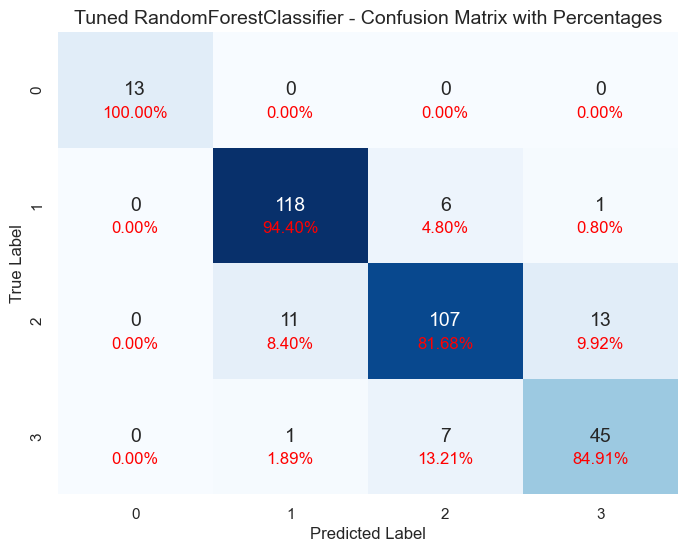

Tuned XGBClassifier - Accuracy: 0.8354037267080745
Tuned XGBClassifier - Precision: 0.8384662700160519
Tuned XGBClassifier - Recall: 0.8093686169800243
Tuned XGBClassifier - F1-score: 0.822361372705401


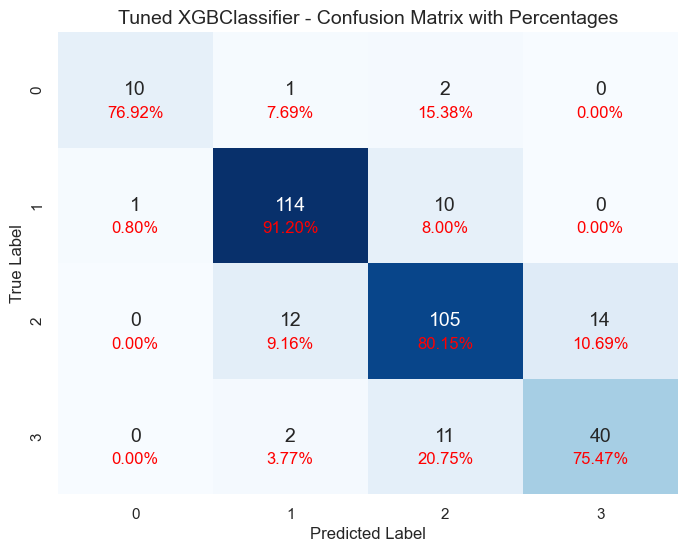

In [31]:
# Predictions and evaluation for the tuned RandomForestClassifier
y_pred_rf_tuned = best_rf_model.predict(X_test_imputed)

accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
precision_rf_tuned = precision_score(y_test, y_pred_rf_tuned, average='macro')
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned, average='macro')
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned, average='macro')

# Display metrics for RandomForest
print(f"Tuned RandomForestClassifier - Accuracy: {accuracy_rf_tuned}")
print(f"Tuned RandomForestClassifier - Precision: {precision_rf_tuned}")
print(f"Tuned RandomForestClassifier - Recall: {recall_rf_tuned}")
print(f"Tuned RandomForestClassifier - F1-score: {f1_rf_tuned}")

# Plot heatmap for RandomForest
plot_confusion_matrix_heatmap("Tuned RandomForestClassifier", y_test, y_pred_rf_tuned)

# Predictions and evaluation for the tuned XGBClassifier
y_pred_xgb_tuned = best_xgb_model.predict(X_test_imputed) + 1  # Adjust labels back

accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned, average='macro')
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned, average='macro')
f1_xgb_tuned = f1_score(y_test, y_pred_xgb_tuned, average='macro')

# Display metrics for XGBClassifier
print(f"Tuned XGBClassifier - Accuracy: {accuracy_xgb_tuned}")
print(f"Tuned XGBClassifier - Precision: {precision_xgb_tuned}")
print(f"Tuned XGBClassifier - Recall: {recall_xgb_tuned}")
print(f"Tuned XGBClassifier - F1-score: {f1_xgb_tuned}")

# Plot heatmap for XGBClassifier
plot_confusion_matrix_heatmap("Tuned XGBClassifier", y_test, y_pred_xgb_tuned)

In [32]:
import os

In [33]:
current = os.getcwd()
current

'c:\\Users\\ashka\\Downloads\\Kaggle\\Obesity Dataset'